In [10]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('/home/dane_linii_lotniczych.csv')
print(data)

   Year  Fatal accidents  Passenger deaths  Miles flown [100 mln miles]
0  1976               24               734                       3863.0
1  1977               25               516                       4300.0
2  1978               31               754                       5027.0
3  1979               31               877                       5481.0
4  1980               22               814                       5814.0
5  1981               21               362                       6033.0
6  1982               26               764                       5877.0
7  1983               20               809                       6223.0
8  1984               16               223                       7433.0
9  1985               22              1066                       7107.0


In [2]:
model_ppc=CmdStanModel(stan_file='/home/lab5_model1.stan')
samples = model_ppc.sample(iter_sampling= 1000,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True)

INFO:cmdstanpy:compiling stan file /home/lab5_model1.stan to exe file /home/lab5_model1
INFO:cmdstanpy:compiled model executable: /home/lab5_model1
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [3]:
df = samples.draws_pd()
df

,lp__,accept_stat__,alpha,y_i,theta,n_i,lambda
0,0.0,0.0,3.48154,18.0,0.324061,-1.411170,20.5782
1,0.0,0.0,3.43994,24.0,0.284189,-0.583345,26.4210
2,0.0,0.0,3.45541,46.0,0.413223,1.058350,49.0455
3,0.0,0.0,2.94414,19.0,0.341851,0.127775,19.8424
4,0.0,0.0,3.55346,40.0,0.276520,-0.338169,31.8155
...,...,...,...,...,...,...,...
995,0.0,0.0,3.07842,6.0,0.162871,-2.226700,15.1160
996,0.0,0.0,3.18808,16.0,0.254764,-0.880151,19.3724
997,0.0,0.0,2.90672,18.0,0.288981,0.141321,19.0594
998,0.0,0.0,3.48151,33.0,0.137737,-0.297186,31.2051


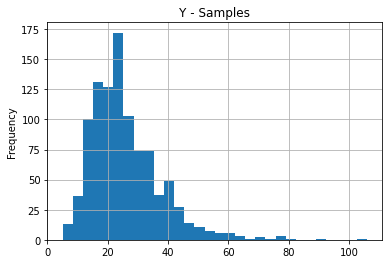

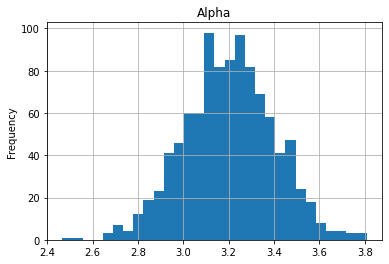

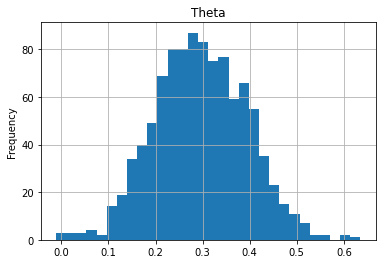

In [5]:
#ex 1
df['y_i'].plot.hist(bins = 30)
plt.title("Y - Samples")
plt.grid()
plt.show()

df['alpha'].plot.hist(bins = 30)
plt.title("Alpha")
plt.grid()
plt.show()

df['theta'].plot.hist(bins = 30)
plt.title("Theta")
plt.grid()
plt.show()

In [11]:
#Fit model
data['Miles flown [100 mln miles]'] /= 1000
data['Miles flown [100 mln miles]'] = data['Miles flown [100 mln miles]'] - data['Miles flown [100 mln miles]'].mean()
data

,Year,Fatal accidents,Passenger deaths,Miles flown [100 mln miles]
0,1976,24,734,-1.8528
1,1977,25,516,-1.4158
2,1978,31,754,-0.6888
3,1979,31,877,-0.2348
4,1980,22,814,0.0982
5,1981,21,362,0.3172
6,1982,26,764,0.1612
7,1983,20,809,0.5072
8,1984,16,223,1.7172
9,1985,22,1066,1.3912


In [19]:
model_2=CmdStanModel(stan_file='/home/lab5_model2.stan')

R = 1000
fit = model_2.sample(data={"N": data.shape[0], "n_i": data["Miles flown [100 mln miles]"].values, "accidents": data["Fatal accidents"].values})
df2 = fit.draws_pd()
df2

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▍         | 00:00 Status
chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed                       

chain 3 |██████████| 00:00 Sampling completed


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,theta,accidents_sample[1],accidents_sample[2],accidents_sample[3],accidents_sample[4],accidents_sample[5],accidents_sample[6],accidents_sample[7],accidents_sample[8],accidents_sample[9],accidents_sample[10]
0,511.526,0.959723,0.942979,2.0,3.0,0.0,-511.015,3.12955,0.033504,17.0,18.0,21.0,26.0,22.0,26.0,24.0,27.0,21.0,24.0
1,511.834,0.991240,0.942979,2.0,3.0,0.0,-511.443,3.15500,0.015274,25.0,18.0,33.0,24.0,25.0,15.0,19.0,19.0,32.0,25.0
2,511.817,0.990420,0.942979,2.0,3.0,0.0,-511.754,3.15763,-0.007102,24.0,22.0,29.0,17.0,18.0,30.0,29.0,26.0,24.0,11.0
3,506.274,0.569347,0.942979,2.0,3.0,0.0,-505.528,3.26490,0.157400,20.0,21.0,21.0,25.0,30.0,25.0,35.0,25.0,38.0,32.0
4,507.816,1.000000,0.942979,2.0,3.0,0.0,-505.005,3.20140,-0.137251,34.0,30.0,21.0,25.0,27.0,20.0,32.0,35.0,24.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,511.210,0.992304,0.872382,3.0,7.0,0.0,-510.335,3.20566,0.060254,21.0,27.0,22.0,23.0,24.0,40.0,20.0,16.0,25.0,25.0
3996,511.073,0.972760,0.872382,1.0,1.0,0.0,-510.976,3.20654,0.066347,20.0,17.0,22.0,28.0,27.0,35.0,21.0,35.0,28.0,34.0
3997,510.840,0.945464,0.872382,2.0,3.0,0.0,-509.955,3.11046,0.063560,16.0,37.0,13.0,22.0,18.0,28.0,19.0,21.0,23.0,20.0
3998,511.647,0.948482,0.872382,2.0,3.0,0.0,-510.267,3.13622,-0.011542,21.0,22.0,29.0,20.0,30.0,27.0,20.0,32.0,31.0,25.0


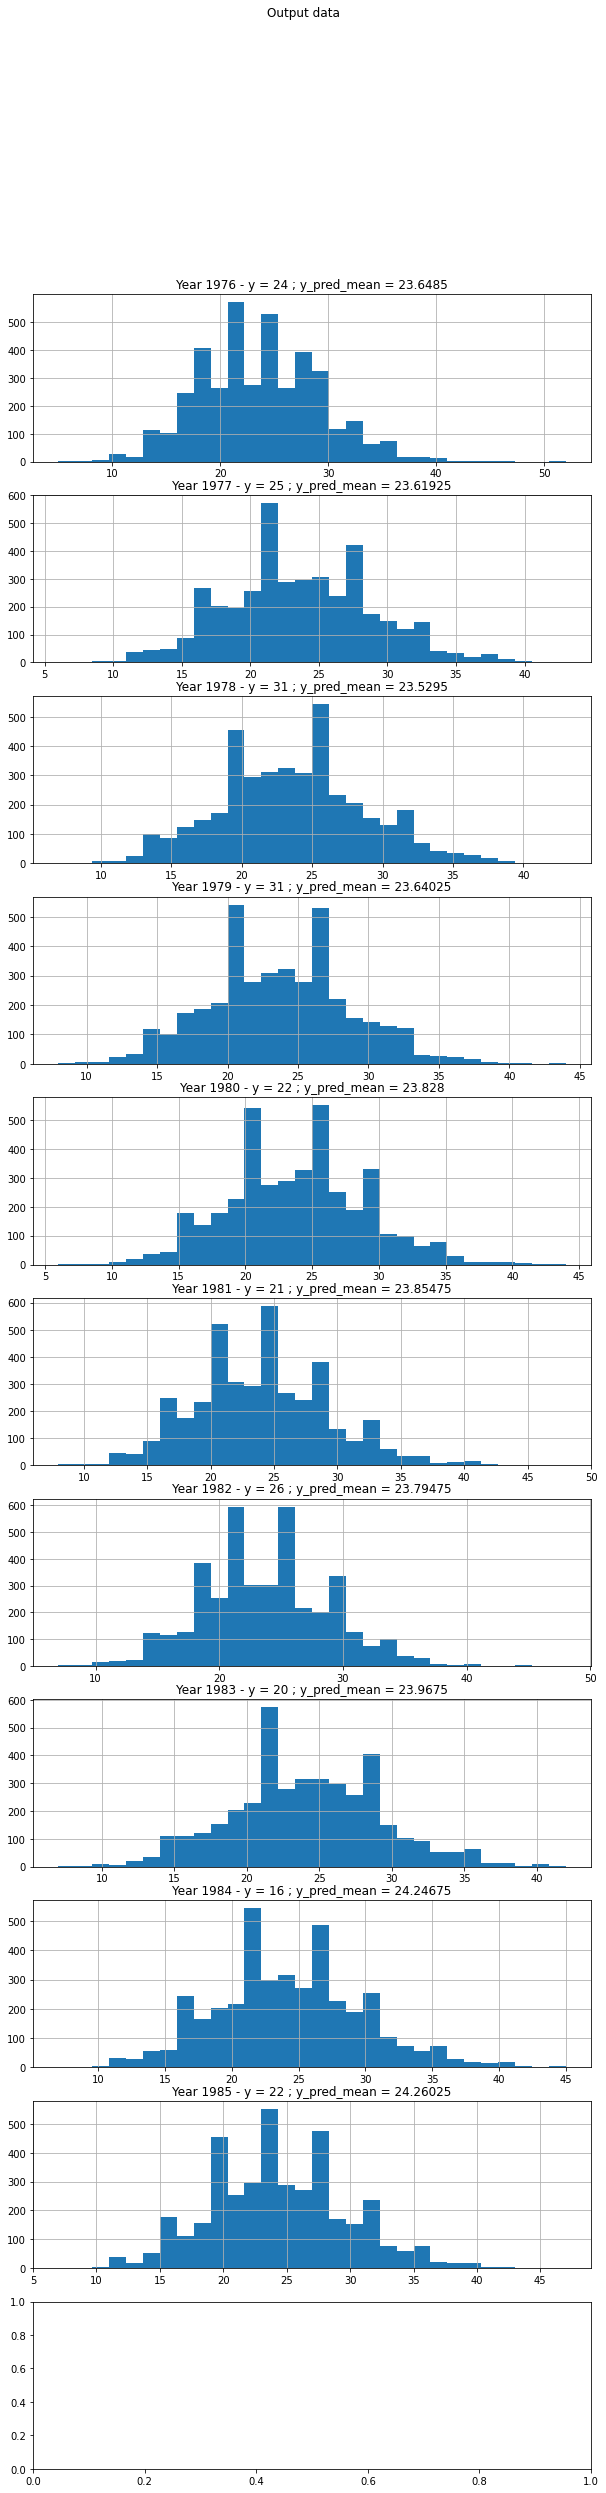

In [24]:
fig, axs = plt.subplots(11, figsize=(10, 40))
fig.suptitle('Output data')
year = 1976
for i in range(1,11):
    axs[i-1].hist(df2[f'accidents_sample[{i}]'], bins = 30)
    axs[i-1].grid()
    axs[i-1].set_title(f"Year {year} - y = {data['Fatal accidents'][i-1]} ; y_pred_mean = {df2[f'accidents_sample[{i}]'].mean()}")
    year += 1

In [25]:
model_3=CmdStanModel(stan_file='/home/lab5_model3.stan')

R = 1000
fit = model_3.sample(data={"N": data.shape[0], "n_i": data["Miles flown [100 mln miles]"].values, "accidents": data["Fatal accidents"].values})
df3 = fit.draws_pd()
df3

INFO:cmdstanpy:compiling stan file /home/lab5_model3.stan to exe file /home/lab5_model3
INFO:cmdstanpy:compiled model executable: /home/lab5_model3
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/lab5_model3.hpp /home/lab5_model3.stan
Warning in '/home/lab5_model3.stan', line 3, column 4: Declaration of arrays
    by placing brackets after a variable name is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/home/lab5_model3.stan', line 4, column 4: Declaration of arrays
    by placing brackets after a variable name is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/home/lab5_model3.stan', line 20, column 4: Declaration of arrays
    by placing brackets after a variable name is deprecated and will be
   

INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha[1],alpha[2],alpha[3],...,accidents_sample[1],accidents_sample[2],accidents_sample[3],accidents_sample[4],accidents_sample[5],accidents_sample[6],accidents_sample[7],accidents_sample[8],accidents_sample[9],accidents_sample[10]
0,509.423,0.975194,0.583548,3.0,7.0,0.0,-502.386,3.29818,3.23037,3.42212,...,26.0,28.0,22.0,37.0,28.0,17.0,28.0,32.0,24.0,32.0
1,505.572,0.674546,0.583548,3.0,7.0,0.0,-499.125,2.92839,3.41509,3.45103,...,20.0,27.0,29.0,28.0,23.0,21.0,14.0,22.0,14.0,18.0
2,505.365,0.939585,0.583548,3.0,7.0,0.0,-501.454,3.46006,2.90048,3.07762,...,25.0,10.0,26.0,17.0,16.0,18.0,30.0,27.0,25.0,31.0
3,508.274,1.000000,0.583548,3.0,7.0,0.0,-501.569,3.16631,3.44320,3.53185,...,22.0,38.0,31.0,33.0,19.0,19.0,20.0,28.0,22.0,24.0
4,507.148,0.964265,0.583548,3.0,7.0,0.0,-502.328,3.40323,3.00020,3.08655,...,24.0,19.0,21.0,24.0,27.0,28.0,19.0,22.0,26.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,506.504,0.766628,0.550977,3.0,7.0,0.0,-497.604,3.26339,3.34326,3.53762,...,25.0,36.0,33.0,32.0,42.0,18.0,26.0,23.0,29.0,18.0
3996,505.010,0.982789,0.550977,3.0,7.0,0.0,-500.781,2.92040,3.01323,3.21991,...,16.0,14.0,14.0,23.0,13.0,26.0,21.0,25.0,19.0,22.0
3997,505.495,0.957099,0.550977,3.0,7.0,0.0,-497.871,3.23058,3.43356,3.33566,...,29.0,20.0,23.0,29.0,25.0,34.0,13.0,34.0,8.0,24.0
3998,509.860,0.962924,0.550977,3.0,7.0,0.0,-500.045,3.31278,3.43238,3.34256,...,21.0,31.0,31.0,22.0,26.0,28.0,18.0,32.0,16.0,22.0


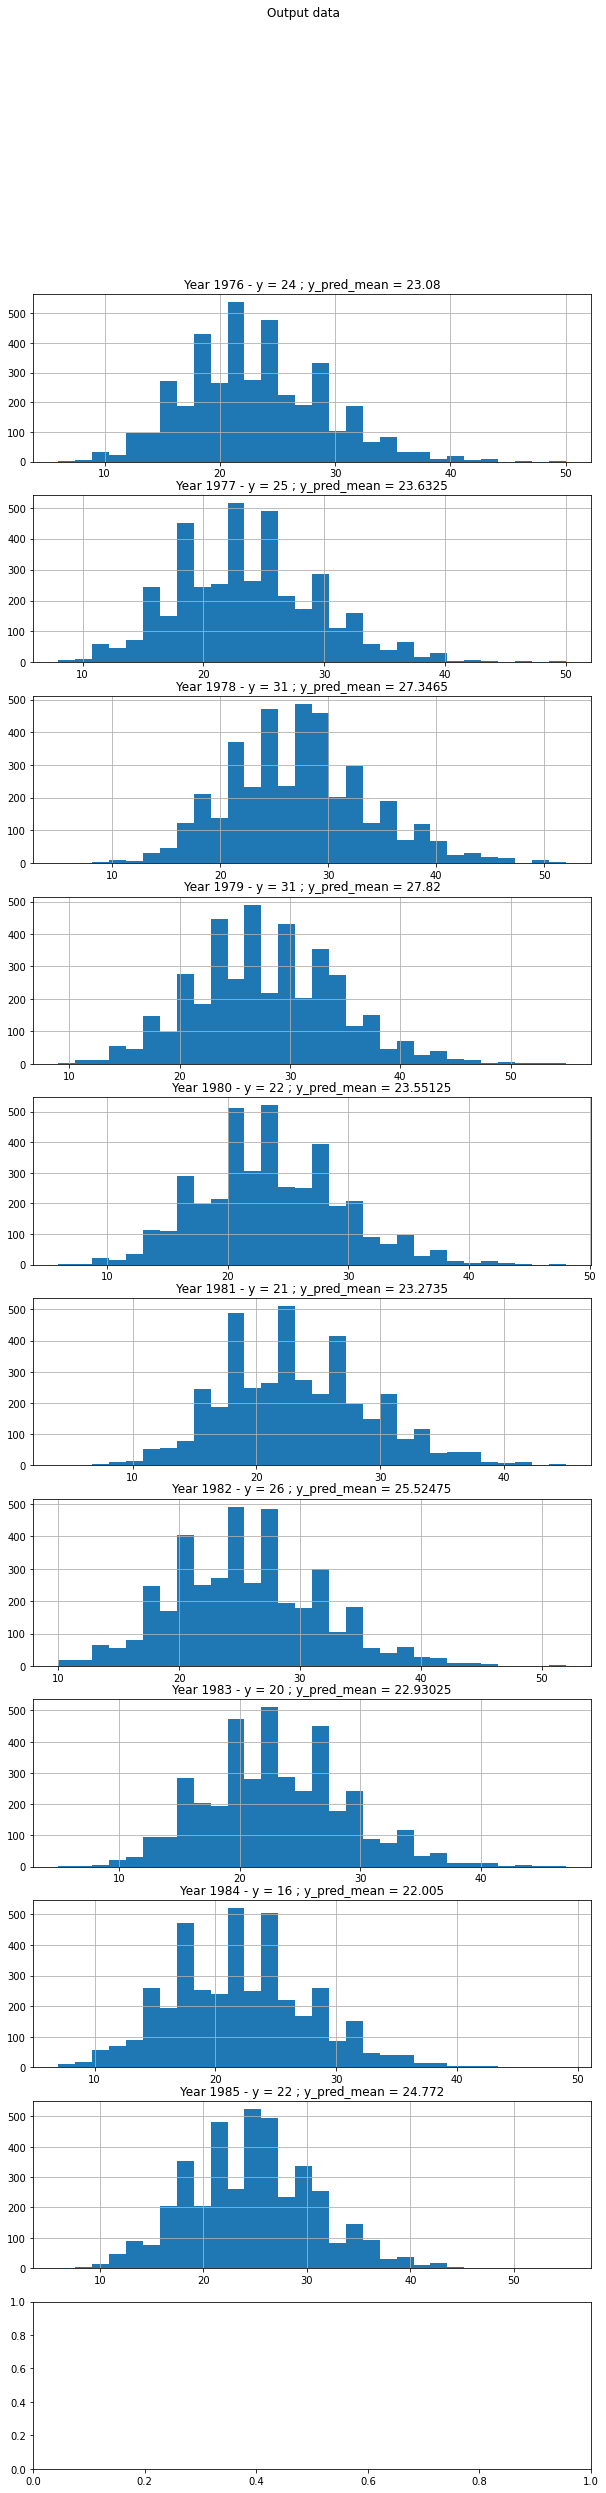

In [26]:
fig, axs = plt.subplots(11, figsize=(10, 40))
fig.suptitle('Output data')
year = 1976
for i in range(1,11):
    axs[i-1].hist(df3[f'accidents_sample[{i}]'], bins = 30)
    axs[i-1].grid()
    axs[i-1].set_title(f"Year {year} - y = {data['Fatal accidents'][i-1]} ; y_pred_mean = {df3[f'accidents_sample[{i}]'].mean()}")
    year += 1